In [100]:
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [101]:
from sklearn.datasets import load_breast_cancer, load_boston

In [102]:
boston = load_boston()
cancer = load_breast_cancer()

In [103]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [104]:
df['target'] = boston['target']

In [105]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], 1), df['target'], test_size=0.3)

In [106]:
svr_pipeline = Pipeline([
    ('MinMaxSclaer', MinMaxScaler()),
    ('SVR', SVR(kernel='rbf'))
])

In [107]:
parms = {
    'SVR__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'SVR__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
}

In [108]:
gs_model = GridSearchCV(svr_pipeline, parms, n_jobs=-1, cv=5)

In [109]:
gs_model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MinMaxSclaer', MinMaxScaler()),
                                       ('SVR', SVR())]),
             n_jobs=-1,
             param_grid={'SVR__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'SVR__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [111]:
gs_model.best_score_ , gs_model.best_params_

(0.8657155032987178, {'SVR__C': 100, 'SVR__gamma': 1})

In [112]:
gs_model.score(x_test, y_test)

0.8545171556753606

In [133]:
data ={
    'model':['A1','B1','C1'],
    'score':[0.7, 0.9, 0.5]
}

In [135]:
df = pd.DataFrame(data)

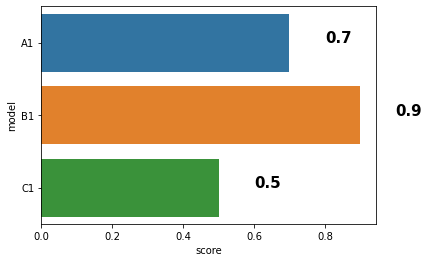

In [145]:
ax = plt.subplot()
sns.barplot(data=df, y='model', x='score')
for i, v in enumerate(df['score']):
    ax.text(v + 0.1, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')